<a href="https://colab.research.google.com/github/ali-rn/visualization/blob/main/assignment_completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

In [88]:
! git clone https://github.com/ali-rn/visualization

fatal: destination path 'visualization' already exists and is not an empty directory.


**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

1. Load the ./data/airbnb_hw.csv data with Pandas. You should have cleaned the Price variable in question 2, and you'll need it later for this question.

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

path = '/content/visualization/assignment/data/airbnb_hw.csv'

df = pd.read_csv(path)

var = 'Price'
df[var] = df[var].str.replace(',','')
df[var] = pd.to_numeric(df[var], errors='coerce')

2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.

In [73]:
df #using df instead to see dimensions

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30473,43022976,8/31/2015,10 Mins to Time Square/two floors,Queens,Apartment,NaN,Entire home/apt,11101.0,5.0,1,0,300,NaN
30474,42993382,8/31/2015,"1BR ocean view & F,Q train st",Brooklyn,Apartment,NaN,Private room,11224.0,2.0,1,0,125,NaN
30475,43033067,8/31/2015,Amazing Private Room,Brooklyn,Other,NaN,Private room,11206.0,1.0,1,0,80,NaN
30476,43000991,8/31/2015,Charming private female room: UWS,Manhattan,Apartment,NaN,Private room,10025.0,1.0,1,0,35,NaN


Dimensions of the data is 30478 rows x 13 columns. There are 30478 observations and the variables are: Host Id, Host Since, Name, Neighbourhood, Property Type, Review Scores Rating (bin), Room Type, Zipcode, Beds, Number of Records, Number of Reviews, Price, Review Score Rating


3. Cross tabulate Room Type and Property Type. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?

In [74]:
pd.crosstab(df['Property Type'],df['Room Type'])

Room Type,Entire home/apt,Private room,Shared room
Property Type,,,
Apartment,15669,10748,685
Bed & Breakfast,13,155,12
Boat,7,1,0
Bungalow,4,0,0
Cabin,1,1,0
Camper/RV,6,1,0
Castle,0,1,0
Chalet,0,1,0
Condominium,72,22,0


General patterns: shared rooms is generally less available than other room types. Entire home/apt is usually the most common room type. Apartments are the most prevalent property type.

Private rooms are more common than renting the entire property in Bed & Breakfasts, Castles, Chalets, Dorms, Houses, Huts, Other, Tents, Treehouses

4. For Price, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use log to transform price into a new variable, price_log, and take these steps again.

<Axes: xlabel='Price', ylabel='Count'>

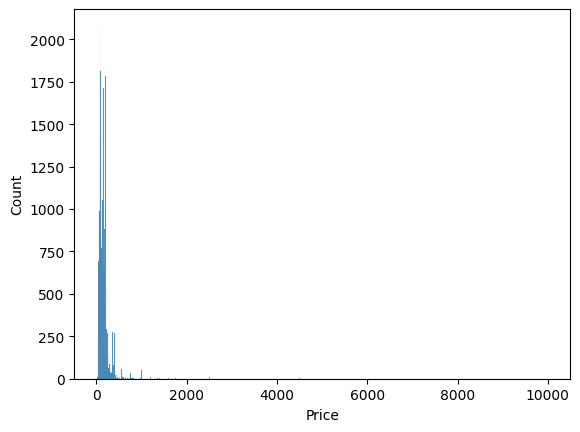

In [75]:
sns.histplot(df['Price'])

<Axes: xlabel='Price', ylabel='Density'>

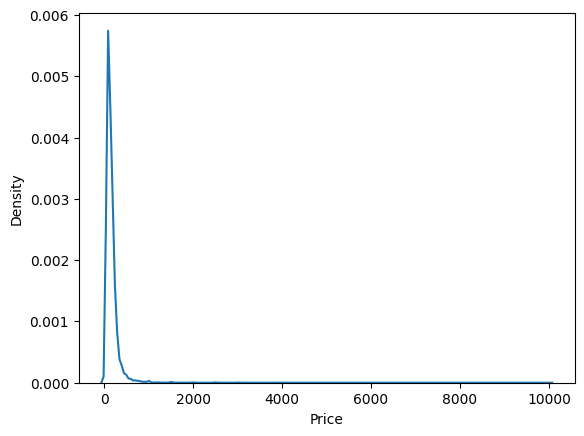

In [76]:
sns.kdeplot(data = df, x = 'Price')

<Axes: xlabel='Price'>

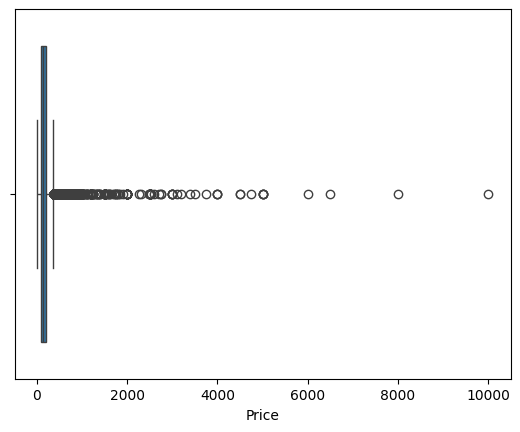

In [77]:
sns.boxplot(data = df, x = 'Price')

In [78]:
df['Price'].describe()

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64

Stat description: this data is badly scaled. There are a lot of outliers and the data is heavily right skewed.

<Axes: xlabel='Price', ylabel='Count'>

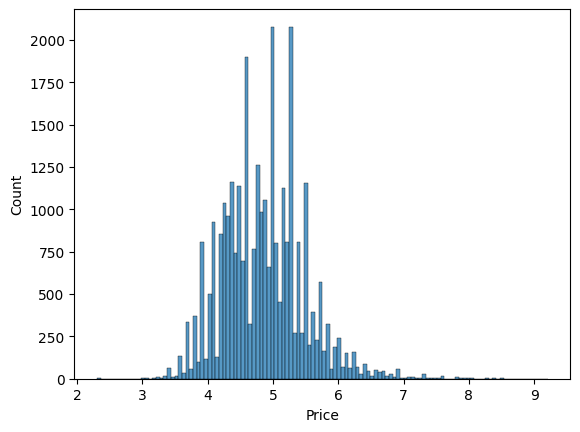

In [79]:
price_log = np.log(df['Price'])
sns.histplot(price_log)

<Axes: xlabel='Price', ylabel='Density'>

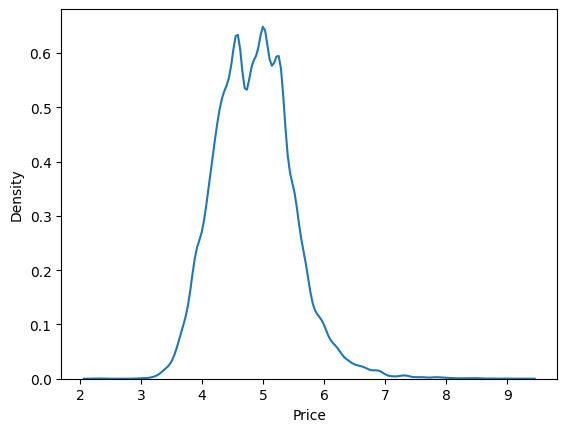

In [80]:
sns.kdeplot(price_log)

<Axes: xlabel='Price'>

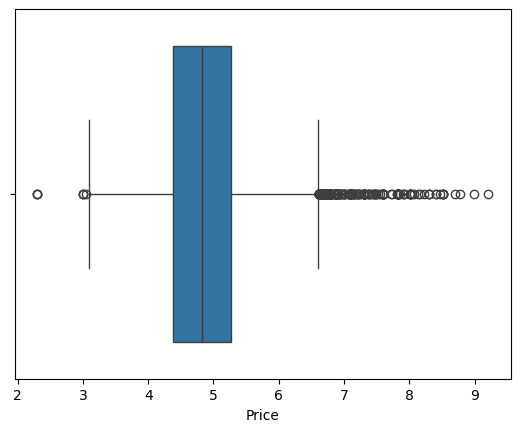

In [81]:
sns.boxplot(data = df, x = price_log)

In [46]:
price_log.describe()

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: Price, dtype: float64

5. Make a scatterplot of price_log and Beds. Describe what you see. Use .groupby() to compute a desciption of Price conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.

<Axes: xlabel='Beds', ylabel='Price'>

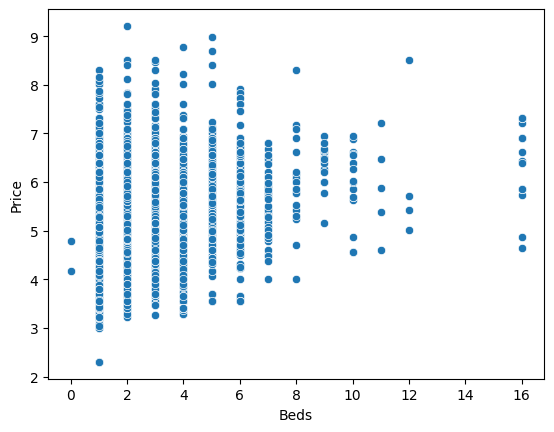

In [82]:
sns.scatterplot(data = df, x = df['Beds'], y = price_log)

Prices and number of Beds seem to have no real correlation. However, there are less options overall at bed counts above 6 and as the bed count increases, the variation in price decreases.

In [83]:
df.loc[:,['Price','Beds']].groupby('Beds').describe()

Price                                                           \
        count         mean          std    min     25%    50%      75%   
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.217588  100.0  220.00  359.0   650.00   
12.0      4.0  1418.750000  2388.285211  150.0  206.25  262.5  1475.00   
16.0     13.0   736.000000   496.804287  104.0  350.00  625.0  1000.00   

               
          max  
Beds           
0.0     119.0  
1.0    4000.0  
2.0   10000.0  
3.0    5000.0  
4.0    6500.0  
5.0    8000.0  
6.0    2750.0  
7.0     900.0  
8.0    4000.0  
9.0    1050.0  
10.0   1050.0  
11.0   1350.0  
12.0   5000.0  
16.0   1500.0

The average price steadily increases with to above $700. Standard deviation stays relatively high after the 0 beds price point.

6. Make a scatterplot of price_log and Beds, but color the graph by Room Type and Property Type. What patterns do you see? Compute a description of Price conditional on Room Type and Property Type. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?


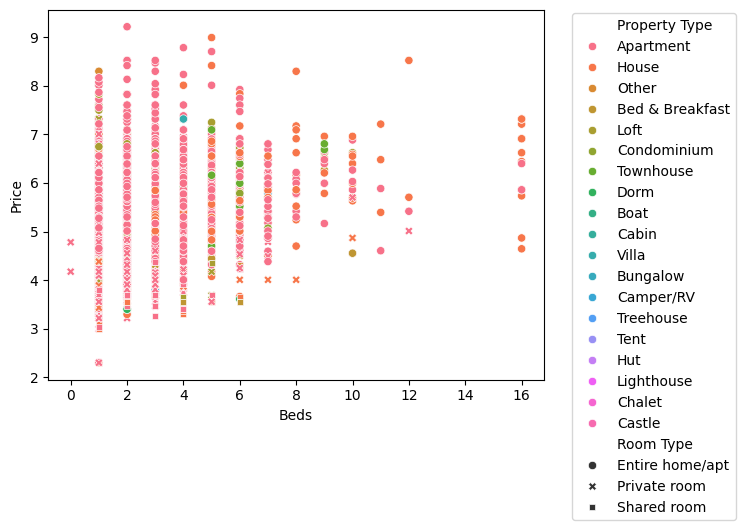

In [84]:
grouping = sns.scatterplot(data = df, x = 'Beds', y = price_log, hue = 'Property Type', style = 'Room Type')
sns.move_legend(grouping, "upper right", bbox_to_anchor=(1.4, 1.01))

I see apartments on the lower end of bed counts and houses on the higher end. Special types of properties (not house or apartment) are usually on the higher price point regardless of bed count.

In [85]:
df.loc[:,['Price','Room Type','Property Type']].groupby(['Room Type','Property Type']).describe()

Price                                  \
                                   count        mean          std    min   
Room Type       Property Type                                              
Entire home/apt Apartment        15669.0  213.224839   218.097834   10.0   
                Bed & Breakfast     13.0  184.538462   119.814172   85.0   
                Boat                 7.0  158.428571    51.110524  100.0   
                Bungalow             4.0  150.750000    46.464144   87.0   
                Cabin                1.0  250.000000          NaN  250.0   
                Camper/RV            6.0  114.333333   107.685963   45.0   
                Condominium         72.0  304.861111   266.197497   80.0   
                Dorm                 4.0   44.250000    24.060687   30.0   
                House              752.0  297.263298   468.409428   27.0   
                Lighthouse           1.0   39.000000          NaN   39.0   
                Loft               392.0  330.510204   321.519721   55.0   
                Other               14.0  843.428571  1133.062271   66.0   
                Townhouse           83.0  280.783133   314.605252   66.0   
                Villa                4.0  529.750000   650.963581  120.0   
Private room    Apartment        10748.0   92.713900    65.237050   10.0   
                Bed & Breakfast    155.0   97.161290    47.031971   32.0   
                Boat                 1.0  120.000000          NaN  120.0   
                Cabin                1.0   80.000000          NaN   80.0   
                Camper/RV            1.0   39.000000          NaN   39.0   
                Castle               1.0  150.000000          NaN  150.0   
                Chalet               1.0   99.000000          NaN   99.0   
                Condominium         22.0   98.590909    40.576394   46.0   
                Dorm                16.0   86.562500    40.738137   50.0   
                House             1258.0   77.750397    49.402650   25.0   
                Hut                  2.0   75.000000    35.355339   50.0   
                Loft               312.0  108.057692   128.817912   39.0   
                Other               29.0  211.931034   235.404505   39.0   
                Tent                 4.0  126.250000    94.989034   40.0   
                Townhouse           52.0   83.365385    30.578109   45.0   
                Treehouse            1.0   95.000000          NaN   95.0   
                Villa                4.0  126.250000    71.107313   60.0   
Shared room     Apartment          685.0   79.200000    67.720849   20.0   
                Bed & Breakfast     12.0  143.666667   245.328104   30.0   
                Dorm                11.0   73.181818    46.328864   30.0   
                House               80.0   77.487500   275.409936   10.0   
                Loft                49.0   78.816327    87.521824   30.0   
                Other                4.0  148.750000   134.806961   70.0   
                Townhouse            1.0   95.000000          NaN   95.0   
                Treehouse            3.0  167.666667   114.788211   95.0   

                                                                  
                                    25%    50%      75%      max  
Room Type       Property Type                                     
Entire home/apt Apartment        135.00  175.0   235.00  10000.0  
                Bed & Breakfast  121.00  130.0   220.00    525.0  
                Boat             122.50  150.0   182.00    250.0  
                Bungalow         133.50  160.5   177.75    195.0  
                Cabin            250.00  250.0   250.00    250.0  
                Camper/RV         49.00   74.0   114.00    325.0  
                Condominium      155.00  200.0   375.00   1990.0  
                Dorm              30.00   33.5    47.75     80.0  
                House            126.50  195.0   300.00   8000.0  
                Lighthouse        39.0

Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

Of the Room Types, entire home/apt rentals have the highest price on average. Of the Property Types, renting an "Other" type of property is the most expensive on average. Private rooms and entire apts in other types of properties have the highest standard deviation. In shared rooms, houses have the highest standard deviation.

The median appears to be a more reliable estimate of central tendency because there are so many outliers, which the median is not affected by.



7. We've looked a bit at this price_log and Beds scatterplot. Use seaborn to make a jointplot with kind=hex. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

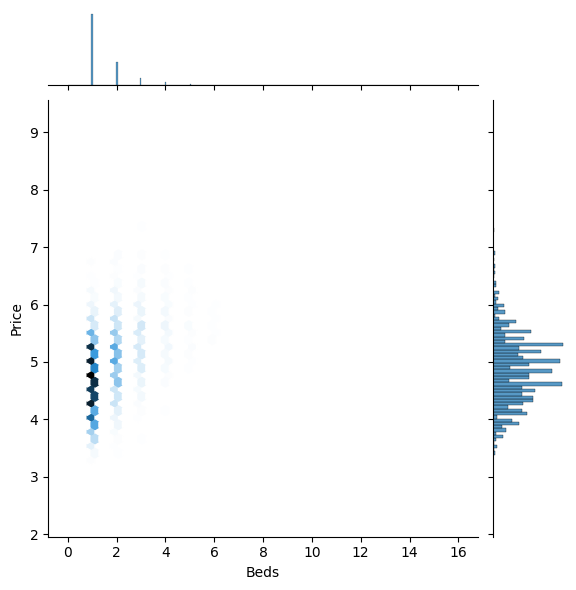

In [86]:
sns.jointplot(x = 'Beds', y = price_log, data = df, kind = 'hex')

Most of the distribution is around 1-4 beds in the log(3.5)-log(6) price range. Viewing this data made me realize that a lot of the distribution and patterns I found in 5 and 6 are negligible or insignificant in the big picture.

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data

Chose the given data set

2. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.

The data dictionary has different missing types and an "Inapplicable/Missing" option for almost all variables. Yes, categorical variables have missing value codes. A simple '.' is placed for missing in numerical variables. Overall, I think the data dictionary could be a little more consistent with how missing data are handled, but it is a fairly extensive and detailed dictionary.

3. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.

I chose three of the demographic/SES variables to better understand what groups of people benefit from medicare. Age, Race/Ethnicity, Education Level.

In [157]:
age = '/Age Among All Medicare Beneficiaries, 2021.xlsx'
race = '/Race_Ethnicity Among All Medicare Beneficiaries, 2021.xlsx'
edu = '/Level of Education Among All Medicare Beneficiaries, 2021.xlsx'

dfa = pd.read_excel(age)
dfa

,Breakdown Category,Overall
0,< 45 years,2.6 (0.0)
1,45-64 years,9.9 (0.0)
2,65-74 years,50.2 (0.0)
3,75-84 years,26.7 (0.0)
4,85+ years,10.6 (0.0)


Need to cut out the "(0.0)" from the "Overall" column and coerce it to a numeric

In [158]:
#dfa = dfa.drop([0])

dfa['Overall'] = dfa['Overall'].str.replace("0.0","").str.replace("(","").str.replace(")","")
dfa['Overall'] = pd.to_numeric(dfa['Overall'],errors = 'coerce')
dfa

<ipython-input-158-5eca94f352c6>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dfa['Overall'] = dfa['Overall'].str.replace("0.0","").str.replace("(","").str.replace(")","")
<ipython-input-158-5eca94f352c6>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dfa['Overall'] = dfa['Overall'].str.replace("0.0","").str.replace("(","").str.replace(")","")


,Breakdown Category,Overall
0,< 45 years,2.6
1,45-64 years,9.9
2,65-74 years,50.2
3,75-84 years,26.7
4,85+ years,10.6


In [159]:
dfr = pd.read_excel(race)
dfr

,Breakdown Category,Overall
0,White non-Hispanic,75.6 (0.8)
1,Black non-Hispanic,10.1 (0.4)
2,Hispanic,8.8 (0.6)
3,Other Race/Ethnicity,5.5 (0.4)


Need to cut out numbers in parantheses

In [161]:
dfr['Overall'] = dfr['Overall'].str.replace("0.8","").str.replace("0.4","").str.replace("0.6","")
dfr['Overall'] = dfr['Overall'].str.replace("(","").str.replace(")","")
dfr['Overall'] = pd.to_numeric(dfr['Overall'],errors = 'coerce')
dfr

<ipython-input-161-71cbdc409e6e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dfr['Overall'] = dfr['Overall'].str.replace("0.8","").str.replace("0.4","").str.replace("0.6","")
<ipython-input-161-71cbdc409e6e>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dfr['Overall'] = dfr['Overall'].str.replace("(","").str.replace(")","")


,Breakdown Category,Overall
0,White non-Hispanic,75.6
1,Black non-Hispanic,10.1
2,Hispanic,8.8
3,Other Race/Ethnicity,5.5


In [163]:
dfe = pd.read_excel(edu)
dfe

,Breakdown Category,Overall
0,Less than a high school diploma,12.2 (0.5)
1,High school graduate,25.2 (0.6)
2,Some college/vocational school,29.9 (0.6)
3,Bachelor’s degree,18.0 (0.5)
4,Graduate or professional degree,14.8 (0.6)


Likewise here

In [164]:
dfe['Overall'] = dfe['Overall'].str.replace("0.5","").str.replace("0.6","")
dfe['Overall'] = dfe['Overall'].str.replace("(","").str.replace(")","")
dfe['Overall'] = pd.to_numeric(dfe['Overall'],errors = 'coerce')
dfe

<ipython-input-164-5c0647a68a0e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dfe['Overall'] = dfe['Overall'].str.replace("0.5","").str.replace("0.6","")
<ipython-input-164-5c0647a68a0e>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dfe['Overall'] = dfe['Overall'].str.replace("(","").str.replace(")","")


,Breakdown Category,Overall
0,Less than a high school diploma,12.2
1,High school graduate,25.2
2,Some college/vocational school,29.9
3,Bachelor’s degree,18.0
4,Graduate or professional degree,14.8


4. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?

Text(0.5, 0, 'Age Range')

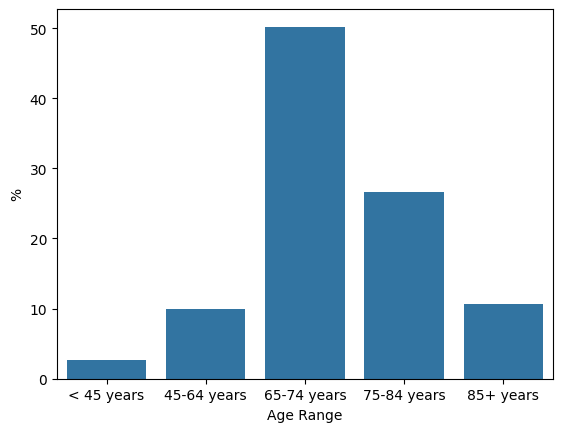

In [176]:
sns.barplot(data = dfa, x = 'Breakdown Category', y = 'Overall')
plt.ylabel("%")
plt.xlabel("Age Range")

Text(0.5, 0, 'Education Level')

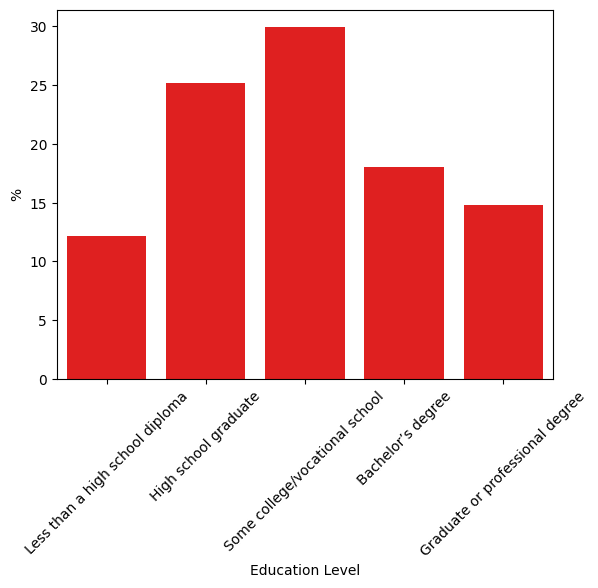

In [175]:
sns.barplot(data = dfe, x = 'Breakdown Category', y = 'Overall', color = 'red')
plt.xticks(rotation = 45)
plt.ylabel("%")
plt.xlabel("Education Level")

Text(0.5, 0, 'Race/Ethnicity')

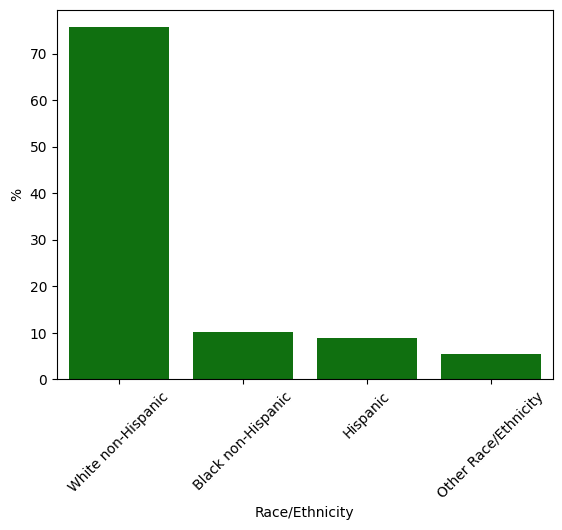

In [174]:
sns.barplot(data = dfr, x = 'Breakdown Category', y = 'Overall', color = 'green')
plt.xticks(rotation = 45)
plt.ylabel("%")
plt.xlabel("Race/Ethnicity")

5. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?

Text(0.5, 0, 'Age Range')

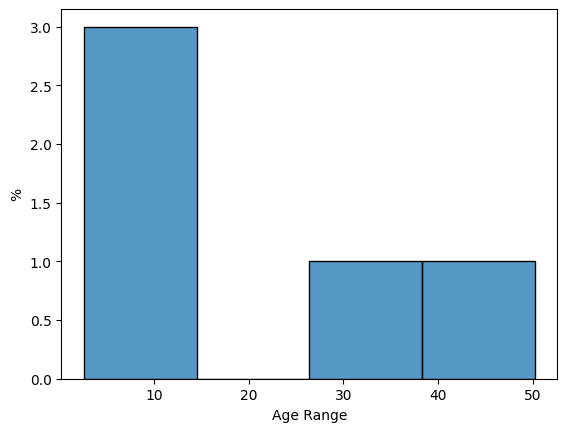

In [181]:
sns.histplot(data = dfa, x = 'Overall')
plt.ylabel("%")
plt.xlabel("Age Range")

I didn't pick any numeric variables, so these histograms won't make much sense. If I do some cleaning, I could make the age range categories more numeric, but that would be a replica of the barplot I already made

6. Create a scatter plot, and describe the relationship you see.

<Axes: xlabel='Overall', ylabel='Breakdown Category'>

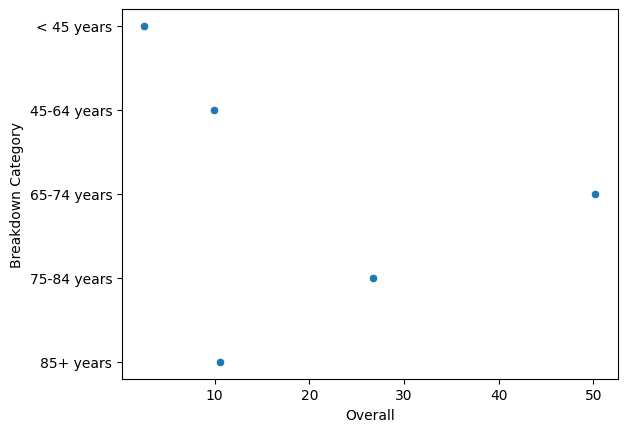

In [183]:
sns.scatterplot(x = 'Overall', y = 'Breakdown Category', data = dfa)

7. Create a table (cross tabulation, variance-covariance, or a .describe() five-number summary), and explain what you see.

In [182]:
dfa['Overall'].describe()

count     5.000000
mean     20.000000
std      19.039827
min       2.600000
25%       9.900000
50%      10.600000
75%      26.700000
max      50.200000
Name: Overall, dtype: float64

In [184]:
dfe['Overall'].describe()

count     5.000000
mean     20.020000
std       7.364238
min      12.200000
25%      14.800000
50%      18.000000
75%      25.200000
max      29.900000
Name: Overall, dtype: float64

In [185]:
dfr['Overall'].describe()

count     4.000000
mean     25.000000
std      33.788854
min       5.500000
25%       7.975000
50%       9.450000
75%      26.475000
max      75.600000
Name: Overall, dtype: float64

What I see here is the averages of the percentage values which are about 20 or 25 which makes sense considering they add up to 100.